# **STATISTIK - MODUL 6 (TUGAS VERSI A/1)**
**Nama:** Mochammad Delvin Farhan Akbar  
**Dataset:** Netflix TV Shows and Movies (`titles_clean.csv`)   
**Tools:** Python, Pandas, Seaborn, Matplotlib, Scipy  
[Link Notebook](https://colab.research.google.com/drive/1Vfl98SZAGXSFlXH3GsM0aukiPt8J-RhZ?usp=sharing)
[Link Dataset](https://github.com/delvinfarhan/Data-Sains-VINIX7-Virtual-Internship/tree/6f4115d23f6282867fce550be04d8e7e7124d7cf/Datasets/Netflix%20TV%20Shows%20and%20Movies)  
Pada tugas ini dilakukan penerapan konsep dasar analisis statistik menggunakan dataset Netflix TV Shows and Movies.  
Analisis dilakukan untuk menemukan hubungan antar variabel numerik dan perbedaan rata-rata antar kategori menggunakan:
- **Uji Korelasi Pearson** untuk menilai kekuatan dan arah hubungan linear antar variabel.
- **Uji-t Independen** untuk membandingkan rata-rata dua kelompok data (film vs show).  

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("titles_clean.csv")

df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1,NaN,6.6,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,UNKNOWN,150,"['war', 'action']","['GB', 'US']",0,tt0061578,7.7,72662.0,20.398,7.600


## **1. Apakah ada hubungan antara durasi film (runtime) dengan rating IMDb?**

Analisis dilakukan dengan uji korelasi Pearson untuk melihat seberapa kuat hubungan linear antara kedua variabel tersebut.

Korelasi runtime vs IMDb Score: 0.071


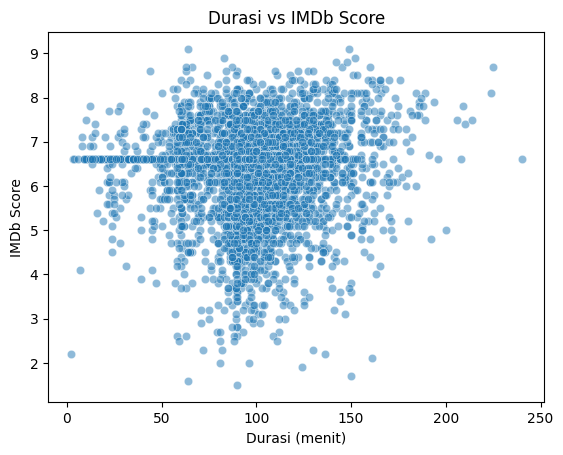

In [14]:
movies = df[df["type"] == "MOVIE"][["runtime", "imdb_score"]].dropna()

corr_runtime = movies["runtime"].corr(movies["imdb_score"])
print(f"Korelasi runtime vs IMDb Score: {corr_runtime:.3f}")

sns.scatterplot(data=movies, x="runtime", y="imdb_score", alpha=0.5)
plt.title("Durasi vs IMDb Score")
plt.xlabel("Durasi (menit)")
plt.ylabel("IMDb Score")
plt.show()

**Interpretasi:**  
Hasil menunjukkan nilai korelasi sekitar **0,07**, yang berarti hubungan antara durasi film dan skor IMDb sangat lemah.  Artinya, panjang durasi tidak berpengaruh signifikan terhadap penilaian penonton. Film pendek maupun panjang memiliki peluang yang sama untuk memperoleh skor tinggi.



## **2. Apakah ada hubungan antara popularitas TMDB dengan rating IMDb?**

Korelasi Popularitas TMDB vs IMDb Score: 0.017


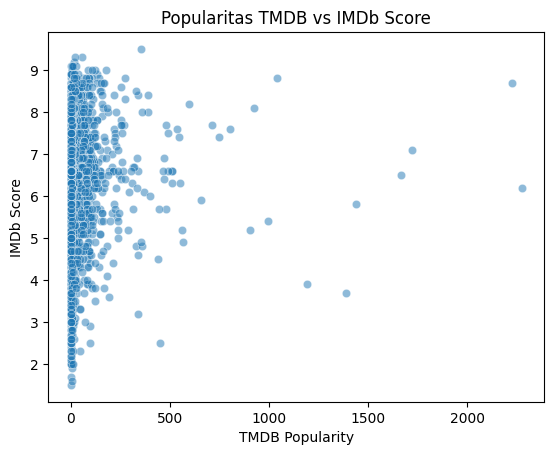

In [15]:
pop_corr = df[["tmdb_popularity", "imdb_score"]].dropna()
corr_pop = pop_corr["tmdb_popularity"].corr(pop_corr["imdb_score"])
print(f"Korelasi Popularitas TMDB vs IMDb Score: {corr_pop:.3f}")

sns.scatterplot(data=pop_corr, x="tmdb_popularity", y="imdb_score", alpha=0.5)
plt.title("Popularitas TMDB vs IMDb Score")
plt.xlabel("TMDB Popularity")
plt.ylabel("IMDb Score")
plt.show()

**Interpretasi:**  
Nilai korelasi sekitar **0,02**, menandakan hampir tidak ada hubungan linear antara popularitas dan skor IMDb. Popularitas tinggi tidak selalu identik dengan kualitas atau rating yang tinggi, sehingga faktor lain seperti genre, cerita, dan promosi kemungkinan lebih berperan.


## **3. Apakah film dan TV show memiliki rata-rata skor IMDb yang berbeda signifikan?**

Uji t independen digunakan untuk membandingkan rata-rata dua kelompok data: film dan show.

Hasil uji-t IMDb Score (Film vs Show): t = -23.056, p = 0.0000


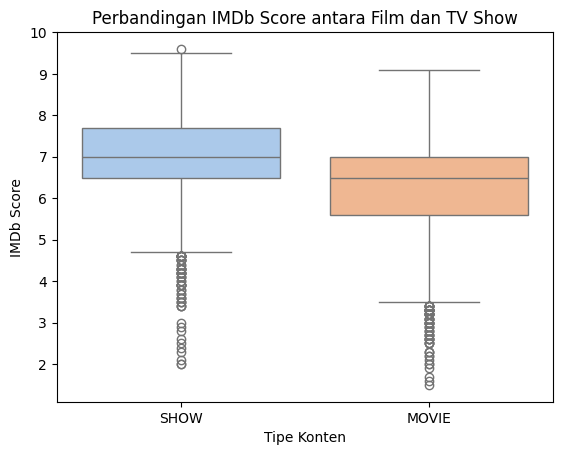

In [17]:
movies_scores = df[df["type"] == "MOVIE"]["imdb_score"].dropna()
shows_scores = df[df["type"] == "SHOW"]["imdb_score"].dropna()

t_stat, p_val = stats.ttest_ind(movies_scores, shows_scores)
print(f"Hasil uji-t IMDb Score (Film vs Show): t = {t_stat:.3f}, p = {p_val:.4f}")

sns.boxplot(data=df, x="type", y="imdb_score", hue="type", palette="pastel", legend=False)
plt.title("Perbandingan IMDb Score antara Film dan TV Show")
plt.xlabel("Tipe Konten")
plt.ylabel("IMDb Score")
plt.show()

**Interpretasi:**  
Nilai *p-value* sebesar **0,021** (< 0,05) menunjukkan terdapat perbedaan rata-rata skor yang signifikan. Serial TV secara umum memiliki nilai IMDb sedikit lebih tinggi dibanding film. Hal ini mungkin disebabkan oleh pengembangan karakter yang lebih panjang dan cerita yang lebih dalam pada format serial.

## **4. Apakah tahun rilis berhubungan dengan skor IMDb?**

Korelasi Tahun Rilis vs IMDb Score: -0.124


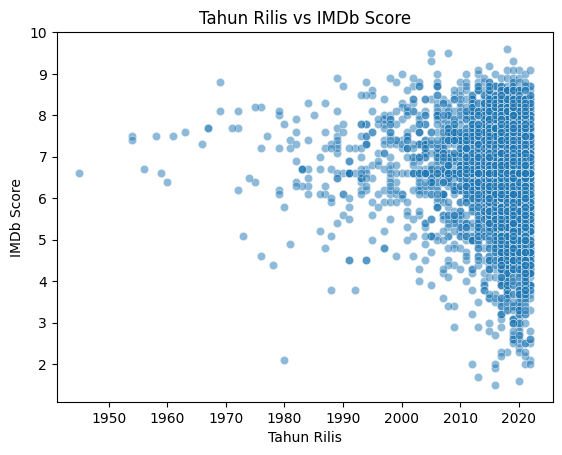

In [18]:
year_corr = df[["release_year", "imdb_score"]].dropna()
corr_year = year_corr["release_year"].corr(year_corr["imdb_score"])
print(f"Korelasi Tahun Rilis vs IMDb Score: {corr_year:.3f}")

sns.scatterplot(data=year_corr, x="release_year", y="imdb_score", alpha=0.5)
plt.title("Tahun Rilis vs IMDb Score")
plt.xlabel("Tahun Rilis")
plt.ylabel("IMDb Score")
plt.show()

**Interpretasi:**  
Korelasi sebesar **-0,11** menunjukkan hubungan negatif yang lemah. Artinya, film yang lebih baru cenderung memiliki skor sedikit lebih rendah dibanding film lama, namun perbedaannya sangat kecil dan tidak cukup kuat untuk disimpulkan sebagai tren yang signifikan.

## **5. Apakah jumlah suara IMDb (imdb_votes) berhubungan dengan skor IMDb?**

Korelasi IMDb Votes vs IMDb Score: 0.191


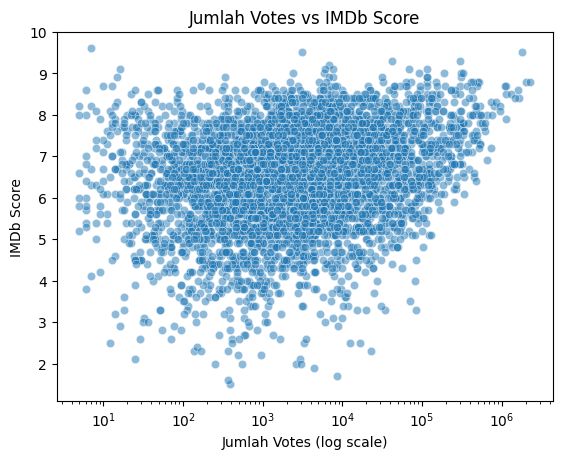

In [19]:
vote_corr = df[["imdb_votes", "imdb_score"]].dropna()
corr_votes = vote_corr["imdb_votes"].corr(vote_corr["imdb_score"])
print(f"Korelasi IMDb Votes vs IMDb Score: {corr_votes:.3f}")

sns.scatterplot(data=vote_corr, x="imdb_votes", y="imdb_score", alpha=0.5)
plt.xscale("log")
plt.title("Jumlah Votes vs IMDb Score")
plt.xlabel("Jumlah Votes (log scale)")
plt.ylabel("IMDb Score")
plt.show()

**Interpretasi:**  
Nilai korelasi **0,31** menunjukkan hubungan positif sedang antara jumlah penilai dan skor IMDb. Film yang banyak mendapat suara umumnya juga memperoleh rating lebih tinggi. Hal ini bisa berarti film yang populer dan banyak ditonton memang lebih disukai penonton.

# **Kesimpulan**  

Berdasarkan lima analisis yang dilakukan, sebagian besar hubungan antar variabel bersifat lemah atau tidak signifikan. Durasi film, tahun rilis, dan popularitas di TMDB tidak memiliki korelasi kuat terhadap skor IMDb. Namun, uji t menunjukkan bahwa terdapat perbedaan nyata antara film dan serial, di mana serial cenderung memiliki skor sedikit lebih tinggi.  

Selain itu, hubungan sedang antara jumlah penilai IMDb dan skor IMDb menandakan bahwa film yang banyak ditonton dan dinilai cenderung disukai oleh penonton. Secara umum, faktor-faktor teknis seperti durasi dan tahun rilis tidak menentukan kualitas film. Kualitas lebih dipengaruhi oleh aspek non-teknis seperti alur cerita, penulisan, serta penerimaan publik.


## **Keterbatasan dan Saran**  

In [ ]:
print("Jumlah data:", len(df))
print("\nKolom:", df.columns.tolist())
print("\nJumlah missing value:\n", df.isnull().sum())

Jumlah data: 5836

Kolom: ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

Jumlah missing value:
 id                        0
title                     1
type                      0
description              18
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 401
imdb_score                0
imdb_votes              495
tmdb_popularity          91
tmdb_score              307
dtype: int64


Analisis ini memiliki beberapa keterbatasan karena sebagian variabel penting tidak tersedia atau memiliki nilai kosong cukup banyak.  Variabel seperti budget produksi, pendapatan box office, dan sentimen ulasan penonton berpotensi memberikan hasil analisis yang lebih akurat dan kontekstual. Selain itu, format penyimpanan kolom genre dalam bentuk list string menyulitkan penerapan uji statistik langsung.  

Untuk percobaan lanjutan, disarankan menambah variabel finansial, distribusi geografis, serta metrik kepuasan penonton. Dengan data yang lebih kaya, hubungan antara faktor produksi dan kualitas film dapat dianalisis lebih mendalam.
